# Problem Statement:
# Design a project from MNIST dataset to identify handwritten digits using SVM algorithm.

## 1. Importing libraries and dataset

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

## 2. Importing Dataset

In [37]:
df = pd.read_csv('digit_svm.csv')

## 3. Data Exploration

In [39]:
df.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.tail(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41990,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41991,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41992,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41993,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41994,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df.shape

(42000, 785)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [47]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [49]:
df.isnull().sum() # Our data contains 0 null values.

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

## Labels in dataset

In [51]:
np.unique(df['label'])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [53]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

## 4. Data Visualization

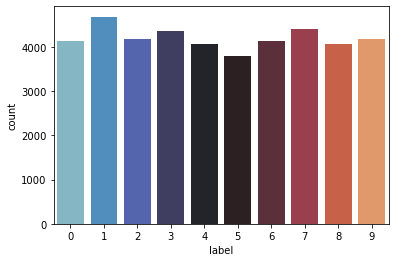

In [55]:
sns.countplot(df['label'],palette = 'icefire')

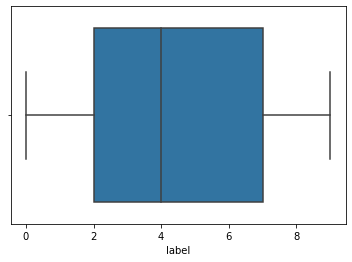

In [57]:
sns.boxplot(x = df['label'])

## Visualizing some pixels

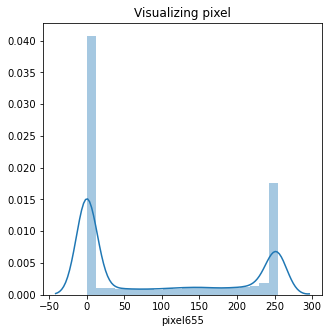

In [59]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel655'])
plt.title("Visualizing pixel")
plt.show()

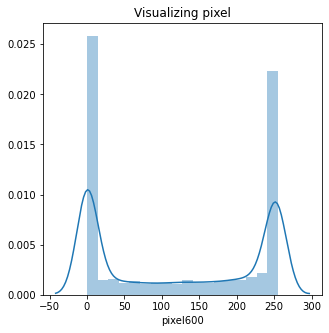

In [61]:
plt.figure(figsize=(5,5))
sns.distplot(df['pixel600'])
plt.title("Visualizing pixel")
plt.show()

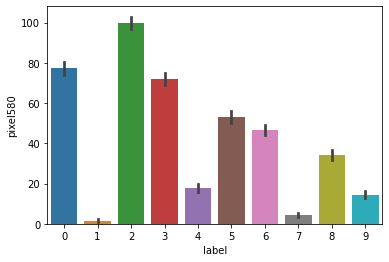

In [63]:
sns.barplot(x='label', y='pixel580', data=df)
plt.show()

## Visualizing label

Text(0.5, 1.0, 'Digit 3')

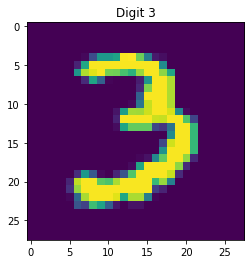

In [65]:
three = df.iloc[9, 1:]
three = three.values.reshape(28,28)
plt.imshow(three)
plt.title("Digit 3")

Text(0.5, 1.0, 'Digit 8')

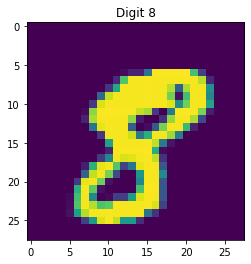

In [67]:
eight = df.iloc[10, 1:]
eight = eight.values.reshape(28,28)
plt.imshow(eight)
plt.title("Digit 8")

## Heatmap

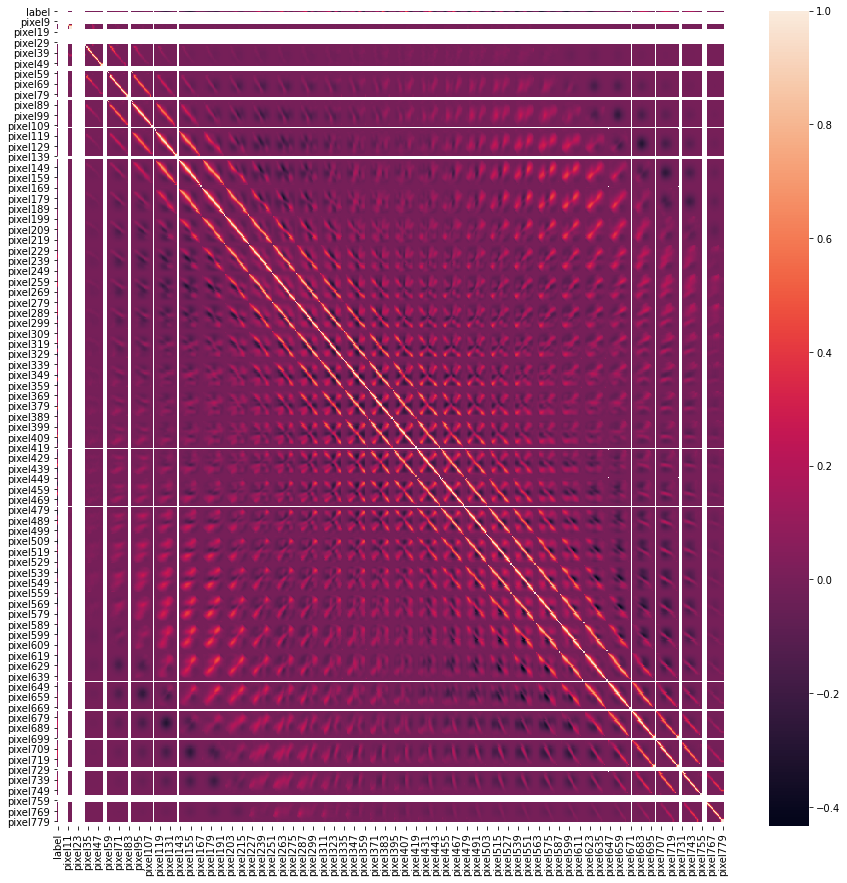

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(data= df.corr(), annot=False)

## 5. Data preprocessing

In [71]:
#splitting into X and y
X = df.drop("label", axis = 1)
y = df['label']

In [73]:
# Scaling the features
x_scale = StandardScaler()
scaledX = x_scale.fit_transform(X)

In [75]:
print(scaledX)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## 6. Train and Test Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, y, test_size = 0.2, random_state = 42)

In [79]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (33600, 784)
y_train shape: (33600,)
X_test shape: (8400, 784)
y_test shape: (8400,)


## 7. Using SVM Algorithm, building our model.

In [81]:
SVM_model = SVC(kernel = 'linear', random_state = 0)
SVM_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [83]:
y_pred = SVM_model.predict(X_test)
print(y_pred)

[8 1 9 ... 3 0 9]


In [84]:
print(y_test)

5457     8
38509    1
25536    9
31803    9
39863    8
        ..
8388     4
29359    9
40276    3
18421    0
4335     9
Name: label, Length: 8400, dtype: int64


## 8. Confusion matrix and accuracy score

In [85]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[793   0   1   2   2   7   8   0   3   0]
 [  0 896   4   0   1   1   1   1   5   0]
 [  6  17 772  12  10   5   9   6   8   1]
 [  4   3  26 833   1  35   0   7  21   7]
 [  3   3  10   0 787   2   8   4   0  22]
 [  5   3   5  32  11 618   8   0  16   4]
 [ 11   2   8   0   5  11 746   0   2   0]
 [  1   4  12  10  15   0   0 821   5  25]
 [  6  12  10  37   7  21   6   4 727   5]
 [  1   2   6  14  31   7   0  28   9 740]]
0.9205952380952381


# The accuracy of SVM linear Model is approx 92%.